In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
print("Numpy version",np.__version__)
print("Panda version",pd.__version__)

Numpy version 1.19.2
Panda version 1.1.3


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
# Percentage of male survivors

In [16]:
# Total number of males
df[df['Sex']=='male'].count()['Age']

453

In [17]:
np.where((df['Age']=='male') & (df['Survived']=='1'))

(array([], dtype=int64),)

In [18]:
df.groupby('Age')['Survived'].sum()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: Survived, Length: 88, dtype: int64

### Checking for duplicates

In [19]:
df.duplicated().sum()

0

### Checking for outliers

<AxesSubplot:xlabel='Survived', ylabel='Age'>

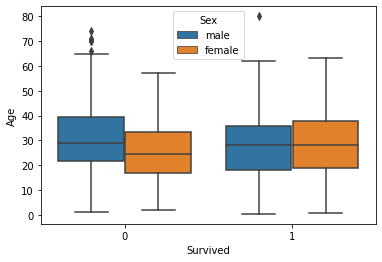

In [20]:
sns.boxplot(y=df['Age'],x=df['Survived'],hue=df['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

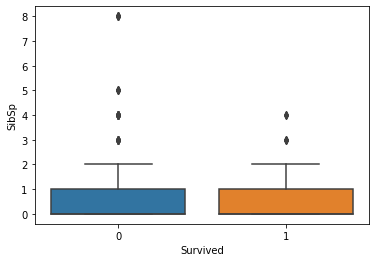

In [21]:
sns.boxplot(y=df['SibSp'],x=df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

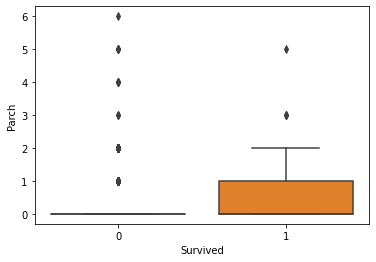

In [22]:
sns.boxplot(y=df['Parch'],x=df['Survived'])

In [23]:
df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [24]:
# Percentage of women who survived
TotalWomen = df[df['Sex']=='female']['PassengerId'].count()
print(TotalWomen)
print("Percentage of women who survived",round((233/314)*100))

314
Percentage of women who survived 74


In [25]:
# Percentage of men who survived
Totalmen = df[df['Sex']=='male']['PassengerId'].count()
print(Totalmen)
print("Percentage of men who survived",round((109/577)*100))

577
Percentage of men who survived 19


In [26]:
233/len(df['Sex']=='female')

0.2615039281705948

In [27]:
df2= pd.read_csv("test.csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Checking for missing values

In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df.isnull().sum()[df.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Missing value treatment

In [31]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
df['Embarked'].mode()

0    S
dtype: object

In [33]:
df3 = df.copy()
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
df3['Embarked'].replace(np.nan,df3['Embarked'].mode().values[0],inplace=True)

<AxesSubplot:xlabel='Age'>

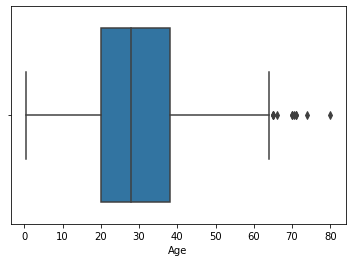

In [35]:
sns.boxplot(df3['Age'])

In [36]:
df3['Age'].median()

28.0

In [37]:
df3['Age'].replace(np.nan,df3['Age'].median(),inplace=True)

### Outlier treatment

In [38]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Scaling

### Checking for correlations

In [39]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

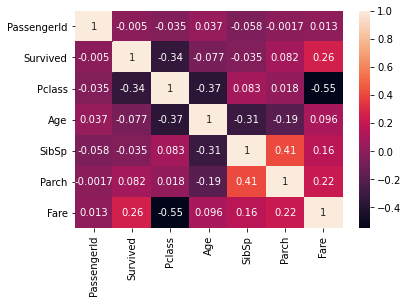

In [40]:
sns.heatmap(df.corr(),annot=True)

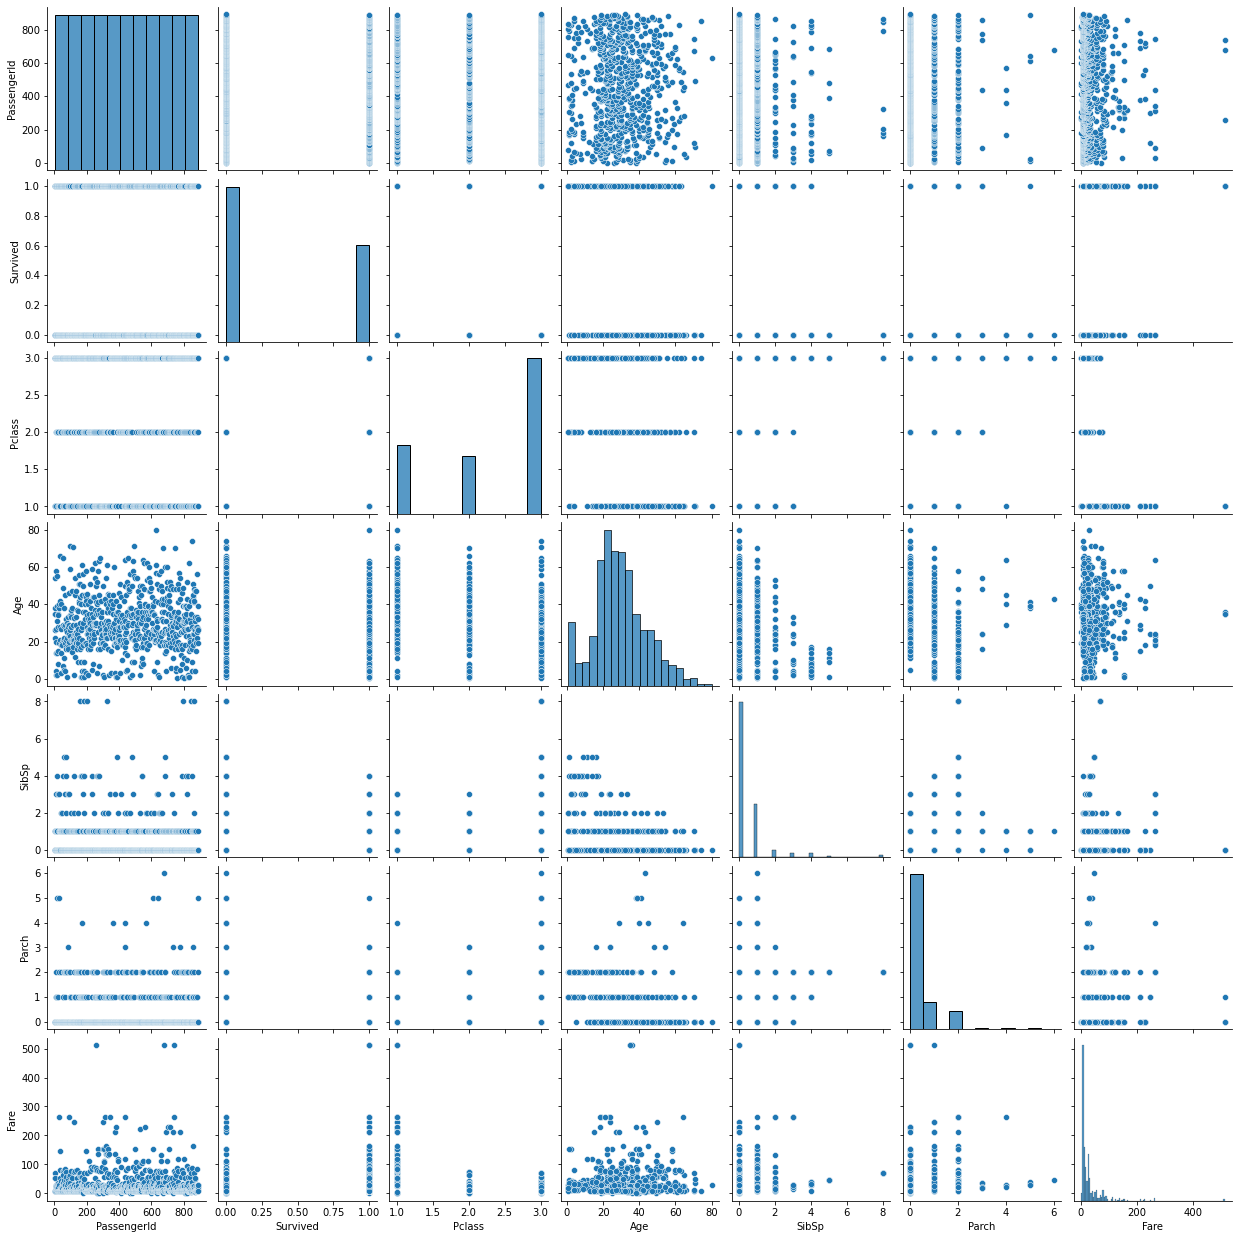

In [41]:
sns.pairplot(df)

### Converting all objects to categorical codes

In [42]:
df3['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [43]:
df3['Sex'] = np.where(df3['Sex']=='male','1',df3['Sex'])
df3['Sex'] = np.where(df3['Sex']=='female','2',df3['Sex'])

In [44]:
df3['Sex'].value_counts()

1    577
2    314
Name: Sex, dtype: int64

In [45]:
df3['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
df3['Embarked'] = np.where(df3['Embarked']=='S','1',df3['Embarked'])
df3['Embarked'] = np.where(df3['Embarked']=='C','2',df3['Embarked'])
df3['Embarked'] = np.where(df3['Embarked']=='Q','3',df3['Embarked'])

In [47]:
df3['Sex'] = df3['Sex'].astype('int64')
df3['Embarked'] = df3['Embarked'].astype('int64')
df3['Age'] = df3['Age'].astype('float64')

In [48]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,28.0,1,2,W./C. 6607,23.4500,NaN,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2


In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [50]:
y_train=df['Survived']

features =['Pclass','Sex','SibSp','Parch']
X_train=pd.get_dummies(df[features])
X_test= pd.get_dummies(df2[features])

In [51]:
df2_copy=df2.copy()

In [52]:
df2_copy['Sex'] = np.where(df2_copy['Sex']=='female','2',df2_copy['Sex'])
df2_copy['Sex'] = np.where(df2_copy['Sex']=='male','1',df2_copy['Sex'])

df2_copy['Embarked'] = np.where(df2_copy['Embarked']=='S','1',df2_copy['Embarked'])
df2_copy['Embarked'] = np.where(df2_copy['Embarked']=='C','2',df2_copy['Embarked'])
df2_copy['Embarked'] = np.where(df2_copy['Embarked']=='Q','3',df2_copy['Embarked'])

df2_copy['Sex'] = df2_copy['Sex'].astype('int64')
df2_copy['Embarked'] = df2_copy['Embarked'].astype('int64')
df2_copy['Age'] = df2_copy['Age'].astype('float64')

In [53]:
X_train_scaled = pd.get_dummies(df3[features])
X_test_scaled = pd.get_dummies(df2_copy[features])

# Scaling

In [54]:
from scipy.stats import zscore
X_train_scaled = X_train_scaled.apply(zscore)
X_test_scaled = X_test_scaled.apply(zscore)

## Random Forest

In [55]:
model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=123)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': predictions})
output.to_csv('RF_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [56]:
X_train.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1


In [57]:
rf_score = model.score(X_train,y_train)
rf_score

0.8148148148148148

## Neural Network

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [59]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_train)

Iteration 1, loss = 0.65384767
Iteration 2, loss = 0.64890464
Iteration 3, loss = 0.64150265
Iteration 4, loss = 0.63321163
Iteration 5, loss = 0.62421337
Iteration 6, loss = 0.61544131
Iteration 7, loss = 0.60700285
Iteration 8, loss = 0.59866914
Iteration 9, loss = 0.59112580
Iteration 10, loss = 0.58367351
Iteration 11, loss = 0.57697988
Iteration 12, loss = 0.57024853
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [60]:
confusion_matrix(y_train,y_pred)

array([[537,  12],
       [192, 150]], dtype=int64)

In [61]:
nn_score=clf.score(X_train,y_train)
nn_score

0.7710437710437711

In [62]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       549
           1       0.93      0.44      0.60       342

    accuracy                           0.77       891
   macro avg       0.83      0.71      0.72       891
weighted avg       0.81      0.77      0.75       891



AUC: 0.826


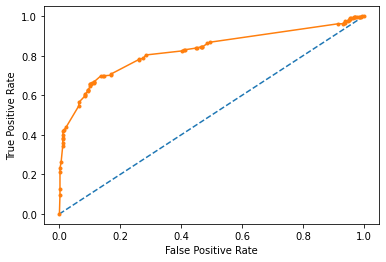

In [63]:
probs = clf.predict_proba(X_train)
probs = probs[:,1]
auc=roc_auc_score(y_train,probs)
print("AUC: %.3f" % auc)
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [64]:
mlp_predictions=clf.predict(X_test)
mlp_output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': mlp_predictions})
mlp_output.to_csv('mlp_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Model tuning using grid search

In [65]:
param_grid= {
    'hidden_layer_sizes':[100,200,300],
    'max_iter':[2500,5000,6000,7000],
    'solver':['sgd','adam'],
    'tol':[0.01]
}
nncl = MLPClassifier(random_state=1)
grid_search = GridSearchCV(estimator=nncl, param_grid=param_grid,cv=10)
grid_search.fit(X_train,y_train)
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

In [66]:
mlp_y_train_predict= best_grid.predict(X_train)
mlp_y_test_predict = best_grid.predict(X_test)

In [67]:
confusion_matrix(y_train,mlp_y_train_predict)

array([[493,  56],
       [118, 224]], dtype=int64)

In [68]:
nn_bestgrid=best_grid.score(X_train,y_train)
nn_bestgrid

0.8047138047138047

In [69]:
print(classification_report(y_train,mlp_y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       549
           1       0.80      0.65      0.72       342

    accuracy                           0.80       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



AUC: 0.854


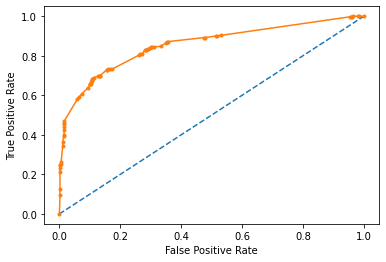

In [70]:
probs = best_grid.predict_proba(X_train)
probs = probs[:,1]
auc=roc_auc_score(y_train,probs)
print("AUC: %.3f" % auc)
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [71]:
bestmlp_output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': mlp_y_test_predict})
bestmlp_output.to_csv('bestmlp_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Decision tree classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [73]:
y_train=df['Survived']

features =['Pclass','Sex','SibSp','Parch']
X_train=pd.get_dummies(df[features])
X_test= pd.get_dummies(df2[features])

In [74]:
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

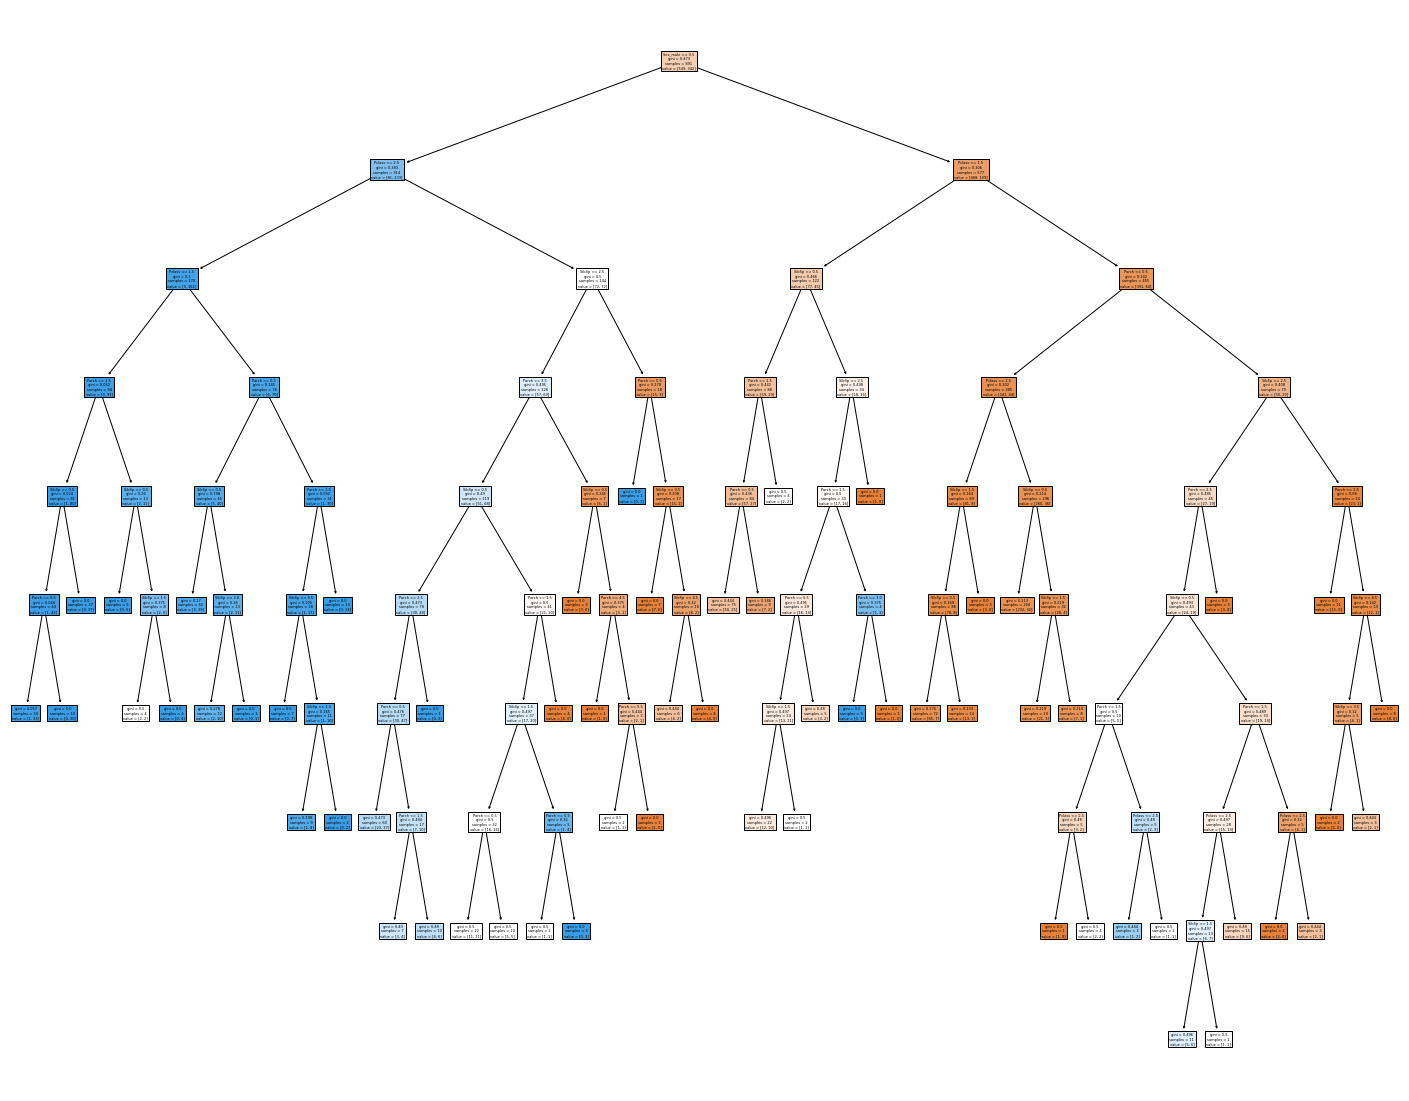

In [75]:
plt.figure(figsize=(25,20))
_=tree.plot_tree(dtc,
            feature_names=X_train.columns,
                filled=True)

In [76]:
train_char_lable = ['No', 'Yes']
ld_tree_file = open('ld_tree_file.dot','w')
dot_tree=tree.export_graphviz(dtc,
                     out_file=ld_tree_file,
                     feature_names=list(X_train),
                     class_names=list(train_char_lable)
                    )
                              
ld_tree_file.close()
(pd.DataFrame(dtc.feature_importances_,columns=["Imp"],index=X_train.columns)).sort_values('Imp',ascending=False)

,Imp
Sex_male,0.626655
Pclass,0.214077
Parch,0.081704
SibSp,0.077564
Sex_female,0.000000


In [77]:
dtc_y_train_predict= dtc.predict(X_train)
dtc_y_test_predict = dtc.predict(X_test)

In [78]:
dt_score=dtc.score(X_train,y_train)
dt_score

0.8170594837261503

In [79]:
confusion_matrix(y_train,dtc_y_train_predict)

array([[506,  43],
       [120, 222]], dtype=int64)

In [80]:
print(classification_report(y_train,dtc_y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       549
           1       0.84      0.65      0.73       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.81       891



In [81]:
dtc_output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': dtc_y_test_predict})
dtc_output.to_csv('dtc_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Regularized decision tree

In [82]:
regdtc = DecisionTreeClassifier(criterion='gini',max_depth=30,min_samples_leaf=100,min_samples_split=1000,random_state=1)
regdtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

In [83]:
regld_tree_file = open('regld_tree_file','w')
tree.export_graphviz(regdtc,
                     out_file='regld_tree_file',
                     feature_names=X_train.columns,
                     class_names=list(train_char_lable)
                    )
regld_tree_file.close()

In [84]:
(pd.DataFrame(regdtc.feature_importances_,columns=["Imp"],index=X_train.columns)).sort_values('Imp',ascending=False)

,Imp
Pclass,0.0
SibSp,0.0
Parch,0.0
Sex_female,0.0
Sex_male,0.0


## Clustering

In [85]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [86]:
df_clus= df.copy()
df_clus

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [87]:
df_clus.drop(columns=['Name'],inplace=True)

In [88]:
df[features]

,Pclass,Sex,SibSp,Parch
0,3,male,1,0
1,1,female,1,0
2,3,female,0,0
3,1,female,1,0
4,3,male,0,0
...,...,...,...,...
886,2,male,0,0
887,1,female,0,0
888,3,female,1,2
889,1,male,0,0


In [89]:
# clusters = fcluster(link_method,2,criterion='maxclust')
# clusters

## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lrm = LogisticRegression(solver="newton-cg",max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lrm.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

#### Predicting on Training and Test dataset

In [92]:
lrm_ytrain_predict = lrm.predict(X_train)
lrm_ytest_predict = lrm.predict(X_test)

#### Getting the Predicted Classes and Probs

In [93]:
lrm_ytest_predict_prob = lrm.predict_proba(X_test)
pd.DataFrame(lrm_ytest_predict_prob).head()

,0,1
0,0.892855,0.107145
1,0.399366,0.600634
2,0.765142,0.234858
3,0.892855,0.107145
4,0.411481,0.588519


#### Model Evaluation

In [94]:
log_score=lrm.score(X_train,y_train)
log_score

0.8002244668911336

In [95]:
logistic_predictions=lrm.predict(X_test)
logistic_output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': logistic_predictions})
logistic_output.to_csv('logistic_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


#### Model tuning

In [96]:
param_grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

Logistic_grid = LogisticRegression(max_iter=10000,n_jobs=3)
grid_search = GridSearchCV(estimator=Logistic_grid, param_grid=param_grid,cv=10,n_jobs=-1,scoring="f1")
grid_search.fit(X_train,y_train)
best_grid = grid_search.best_estimator_
best_grid

LogisticRegression(max_iter=10000, n_jobs=3, solver='sag')

In [97]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=3, solver='sag')


In [98]:
log_bestgrid=best_grid.score(X_train,y_train)
log_bestgrid

0.8002244668911336

## AdaBoostClassifier

In [99]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=1)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [100]:
ada_ytrain_pred = ada_model.predict(X_train)
ada_ytest_pred = ada_model.predict(X_test)

In [101]:
ada_ytest_predcit_prob= ada_model.predict_proba(X_test)
pd.DataFrame(ada_ytest_predcit_prob)

,0,1
0,0.505421,0.494579
1,0.498298,0.501702
2,0.503410,0.496590
3,0.505421,0.494579
4,0.496715,0.503285
...,...,...
413,0.505421,0.494579
414,0.494053,0.505947
415,0.505421,0.494579
416,0.505421,0.494579


In [102]:
ada_score = ada_model.score(X_train,y_train)
ada_score

0.8013468013468014

In [103]:
ada_predictions=ada_model.predict(X_test)
ada_output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': ada_predictions})
ada_output.to_csv('ada_submission.csv', index=False)
print("Your submission for adaBoost was successfully saved!")

Your submission for adaBoost was successfully saved!


## GradientBoostClassifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state=1)
GB.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [105]:
GB_ytrain_pred = GB.predict(X_train)
GB_ytest_pred = GB.predict(X_test)

In [106]:
GB_ytest_predict_prob=GB.predict_proba(X_test)

In [107]:
GB_score = GB.score(X_train,y_train)
GB_score

0.8159371492704826

In [108]:
GB_predictions=GB.predict(X_test)
GB_output = pd.DataFrame({'PassengerID':df2['PassengerId'],'Survived':GB_predictions})
GB_output.to_csv('GB_submission.csv', index=False)
print("Your submission for GBBoost was successfully saved!")

Your submission for GBBoost was successfully saved!


## GB Tuned

In [109]:

# param_grid = {'learning_rate':['0.1','0.001','0.0001'],
#               'n_estimators':['10','100','1000'],
#               'max_leaf_nodes':['1','2','3'],
#               'max_features':['sqrt','log','none'],
#               'max_depth':['1','2','3'],
#               'tol':['0.0001','0.00001','0.001']
# }
# GB2= GradientBoostingClassifier(random_state=2)
# grid_search= GridSearchCV(estimator=GB2,param_grid=param_grid,n_jobs=-1,cv=10)
# grid_search.fit(X_train,y_train)
# best_grid = grid_search.best_estimator_
# best_grid


## XGBoostClassifier

In [110]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [111]:
xgb_train = xgb.DMatrix(X_train,y_train, enable_categorical=True)

In [112]:
n=50
params = {
'objective': 'binary:logistic',
'max_depth': 3,
'learning_rate': 0.1,
}

xgb_model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

[20:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [113]:
xgb_pred = xgb_model.predict(xgb_train)
xgb_pred = xgb_pred.astype(int)
xgb_score = accuracy_score(y_train,xgb_pred)
xgb_score

0.6161616161616161

# LDA

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [115]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [116]:
lda_ytrain_pred = lda.predict(X_train)

In [117]:
lda_score = lda.score(X_train,y_train)
lda_score

0.7912457912457912

In [118]:
lda_predictions=lda.predict(X_test)
lda_output = pd.DataFrame({'PassengerID':df2['PassengerId'],'Survived':lda_predictions})
lda_output.to_csv('lda_submission.csv', index=False)
print("Your submission for LDA was successfully saved!")

Your submission for LDA was successfully saved!


# NaiveBayes

In [119]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [120]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [121]:
NB_ytrain_pred = NB.predict(X_train)

In [122]:
NB_score = NB.score(X_train,y_train)
NB_score

0.8002244668911336

In [123]:
NB_predictions=NB.predict(X_test)
NB_output = pd.DataFrame({'PassengerID':df2['PassengerId'],'Survived':NB_predictions})
NB_output.to_csv('NB_submission.csv', index=False)
print("Your submission for NaiveBayes was successfully saved!")

Your submission for NaiveBayes was successfully saved!


## BernoulliNB

In [124]:
Ber = BernoulliNB()
Ber.fit(X_train,y_train)

BernoulliNB()

In [125]:
Ber_score = Ber.score(X_train,y_train)
Ber_score

0.7867564534231201

In [126]:
Ber_predictions=Ber.predict(X_test)
Ber_output = pd.DataFrame({'PassengerID':df2['PassengerId'],'Survived':Ber_predictions})
Ber_output.to_csv('Ber_submission.csv', index=False)
print("Your submission for BernoulliNaiveBayes was successfully saved!")

Your submission for BernoulliNaiveBayes was successfully saved!


# KNN(K-Nearest Neighbours)

In [127]:
#Perform scaling for best restults

In [128]:
#without scaling results

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [131]:
KNN_score_withoutScaling = KNN.score(X_train,y_train)
KNN_score_withoutScaling

0.8069584736251403

In [132]:
#Applying scaled data
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled,y_train)
KNN_score_withScaling = KNN.score(X_train_scaled,y_train)
KNN_score_withScaling

0.7811447811447811

## Support Vectore Machine

In [133]:
from sklearn import svm
from sklearn.svm import SVC

In [134]:
#Applying non scaled data
svc_nonscaled = SVC()
svc_nonscaled.fit(X_train,y_train)
svc_nonscaled_score = svc_nonscaled.score(X_train,y_train)
print("SVC non scaled score:",svc_nonscaled_score)

0.8058361391694725

In [146]:
#Applying scaled data
svc_scaled = SVC()
svc_scaled.fit(X_train_scaled,y_train)
svc_scaled_score = svc_scaled.score(X_train_scaled,y_train)
print("SVC scaled score:",svc_scaled_score)

svc_predictions = svc_scaled.predict(X_test_scaled)
svc_output = pd.DataFrame({'PassengerID':df2['PassengerId'],'Survived':svc_predictions})
svc_output.to_csv('svc_submision.csv',index=False)
print("Your submission for SVM was successfully saved!")

SVC scaled score: 0.8103254769921436
Your submission for SVM was successfully saved!


## Table depicting the performance of all the algorithms used

In [148]:
score=[rf_score,nn_score,nn_bestgrid,dt_score,log_score,log_bestgrid,ada_score,GB_score,lda_score,NB_score,KNN_score_withoutScaling,KNN_score_withScaling,Ber_score,svc_nonscaled_score,svc_scaled_score]
finaldf=pd.DataFrame(score,index=['Random Forest','NeuralNetwork','NN Tuned Model','DecissionTree','Logistic Regression','Logistic Tuned','AdaBooost','GradientBoost','LDA','Naive Bayes','KNN Without Scaling','KNN With Scaling','BernoulliNB','SVC Without Scaling','SVC With Scaling'],columns=['Score'])
finaldf=finaldf.rename_axis(index="Algorithms")
finaldf.sort_values('Score',ascending=False)

,Score
Algorithms,
DecissionTree,0.817059
GradientBoost,0.815937
Random Forest,0.814815
SVC With Scaling,0.810325
KNN Without Scaling,0.806958
SVC Without Scaling,0.805836
NN Tuned Model,0.804714
AdaBooost,0.801347
Logistic Regression,0.800224


## Scaled data

In [141]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [142]:
df2['Age'].replace(np.nan,df2['Age'].median(),inplace=True)
df2['Embarked'] = np.where(df2['Embarked']=='S','1',df2['Embarked'])
df2['Embarked'] = np.where(df2['Embarked']=='C','2',df2['Embarked'])
df2['Embarked'] = np.where(df2['Embarked']=='Q','3',df2['Embarked'])
df2['Sex'] = np.where(df2['Sex']=='male','1',df2['Sex'])
df2['Sex'] = np.where(df2['Sex']=='female','2',df2['Sex'])

df2['Sex'] = df2['Sex'].astype('int64')
df2['Embarked'] = df2['Embarked'].astype('int64')
df2['Age'] = df2['Age'].astype('float64')

In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


## Random forest with more features

In [145]:
# y_train=df3['Survived']

# features =['Pclass','Sex','SibSp','Parch','Embarked','Age']
# X_train=df3[features]
# X_test= pd.get_dummies(df2[features])
# RF_scaled = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=123)
# RF_scaled.fit(X_train,y_train)

# RF_scaled_predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': RF_scaled_predictions})
# output.to_csv('RF_submission.csv', index=False)
# print("Your submission for radom forest scaled data was successfully saved!")
# RF_scaled_score = RF_scaled.score(X_train,y_train)
# print("Random forest score for scaled data:",RF_scaled_score)